In [1]:
# Use Flask to create and run a server
# Define endpoints using Flask's @app.route decorator
# Extract query variable path values from GET Requests
# Use variable paths to execute database queries on behalf of the client
# Return JSONified query results from API endpoints

# Analyze the Average Open, Average High, Average Low, Average Close for all Stocks for the month of May

In [109]:
import os
from sqlalchemy import create_engine, inspect, func,desc, asc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import datetime as dt
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd

path = os.path.abspath(os.getcwd())+"\dow.db"
engine = create_engine(f"sqlite:///{path}")

inspector = inspect(engine)
inspector.get_table_names()


['dow']

In [23]:
columns = inspector.get_columns('dow')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


In [30]:
engine.execute('select * from dow limit 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [29]:
Base = automap_base()
Base.prepare(engine,reflect=True)

data = Base.classes.dow

In [46]:
# Selecting the Open, High, Low, Close for All Stocks in May

# Figuring out if the Data is only for the 2011 Year
session = Session(engine)
select = session.query(data).order_by(desc(data.date)).limit(1)
for row in select:
    print(row.date)
    
select = session.query(data).order_by(asc(data.date)).limit(1)
for row in select:
    print(row.date)

2011-06-24
2011-01-07


In [188]:
# Filtering the data for only May and the correct columns

select = session.query(data.stock
                       ,func.avg(data.open_price)
                       ,func.avg(data.high_price)
                       ,func.avg(data.low_price)
                       ,func.avg(data.close_price)).\
filter(func.strftime("%m",data.date) == '05').group_by(data.stock).all()

select

[('AA', 16.8475, 17.3375, 16.4175, 16.747500000000002),
 ('AXP', 49.89750000000001, 51.07, 49.315, 50.5025),
 ('BA', 78.7175, 79.2175, 76.8825, 78.2125),
 ('BAC', 12.0, 12.235, 11.7325, 11.8775),
 ('CAT', 108.5525, 110.5975, 104.045, 106.4),
 ('CSCO', 17.067500000000003, 17.255000000000003, 16.5925, 16.8575),
 ('CVX', 103.9725, 105.72749999999999, 100.4575, 102.76249999999999),
 ('DD', 53.9625, 54.9225, 52.14, 53.21),
 ('DIS', 42.3, 42.8175, 41.11749999999999, 41.900000000000006),
 ('GE', 19.96, 20.175, 19.4875, 19.740000000000002),
 ('HD', 36.765, 37.51, 36.504999999999995, 36.7625),
 ('HPQ', 39.315, 40.14, 37.8425, 38.54),
 ('IBM', 169.7025, 171.58, 166.9375, 169.11749999999998),
 ('INTC', 23.0975, 23.67, 22.652500000000003, 23.0225),
 ('JNJ', 65.6575, 66.8475, 65.0575, 66.08749999999999),
 ('JPM', 44.015, 44.709999999999994, 43.019999999999996, 43.527499999999996),
 ('KO', 67.5775, 68.32499999999999, 66.75750000000001, 67.4725),
 ('KRFT', 34.305, 35.0225, 33.945, 34.7375),
 ('MCD', 

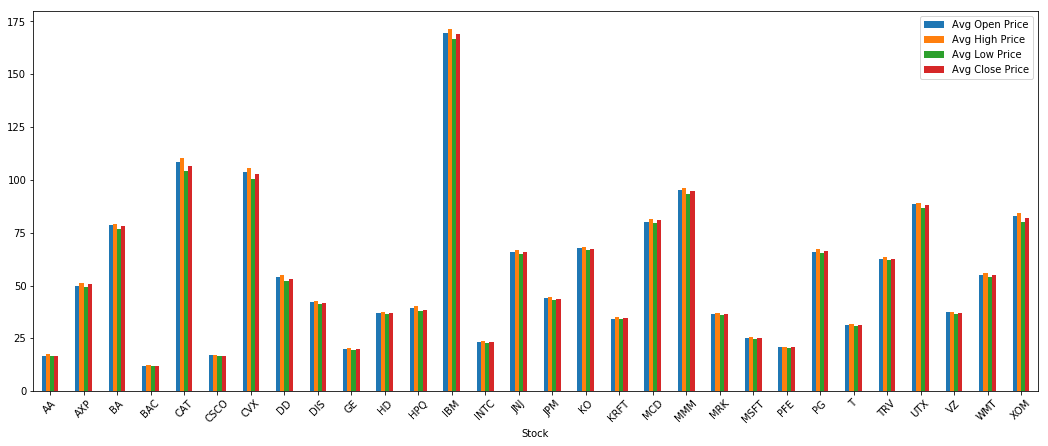

In [186]:
# Creating a Bar Chart Showing the Data

data_frame = pd.DataFrame(select,columns=['Stock','Avg Open Price','Avg High Price','Avg Low Price','Avg Close Price'])
data_frame = data_frame.set_index('Stock')

data_frame.plot(kind='bar',figsize=(18,7),rot=45)
plt.show()

# Calculate the High-Low Peak-to-Peak Values for IBM Stock after 2011-05-31

In [94]:
# Filtering the database for IBM stock prices after 5/31/2015

select = session.query(data).filter_by(stock = 'IBM').\
filter(data.date > dt.date(2011,5,31))

# Creating the PTP values (High Price - Low Price)
ptp = [val.high_price - val.low_price for val in select]

[5.759999999999991, 3.0900000000000034, 3.579999999999984, 3.219999999999999]

<function matplotlib.pyplot.show(*args, **kw)>

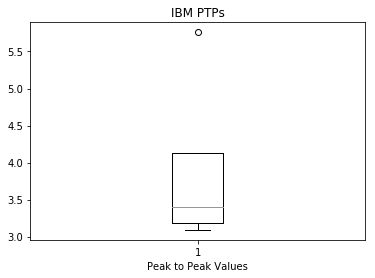

In [182]:
# Creating a boxplot
plt.boxplot(ptp)
plt.xlabel('Peak to Peak Values')
plt.title('IBM PTPs')
plt.show

In [194]:
# 1. import Flask
from flask import Flask

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)

# 3. Define what to do when a user hits the index route
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "Welcome to my 'Home' page!"

# 4. Define what to do when a user hits the /about route
@app.route("/about")
def about():
    print("Server received request for 'About' page...")
    return "Welcome to my 'About' page!"

if __name__ == "__main__":
  app.run(debug=True)

UnsupportedOperation: not writable